In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import animation

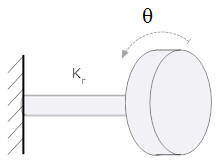

In [43]:
t = smp.symbols('t')
m, l = smp.symbols('m l')
k, g = smp.symbols('k g')
nu = smp.symbols(r'\eta')

In this case our generalised coordinates are $x$ and $\theta$

In [44]:
theta = smp.symbols(r'\theta', cls=smp.Function)

Explicitly write them as functions of time $t$:

In [45]:
theta = theta(t)

Find the derivatives: $\dot\theta$, $\ddot\theta$, $\dot x$, $\ddot x$

In [46]:
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)

Express kinetic and potential energy in terms of the generalised coordinates

In [47]:
# Kinetic energy: 1/2 M * V * V
T = 1/2* m *(smp.diff(l*smp.cos(theta),t)**2 + smp.diff(l*smp.sin(theta),t)**2)

# Potential energy: m*g*h
V = 1/2*k*theta**2 - m*g*smp.sin(theta)

L = T - V

Get Lagrnage's Equations: 
$$ \frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot x} = 0   $$

In [48]:
L

g*m*sin(\theta(t)) - 0.5*k*\theta(t)**2 + 0.5*m*(l**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + l**2*cos(\theta(t))**2*Derivative(\theta(t), t)**2)

In [49]:
LE = (smp.diff(L,theta) - smp.diff(smp.diff(L,theta_d),t) - nu*smp.diff(theta,t)).simplify()

In [50]:
LE

-1.0*\eta*Derivative(\theta(t), t) + 1.0*g*m*cos(\theta(t)) - 1.0*k*\theta(t) - 1.0*l**2*m*Derivative(\theta(t), (t, 2))

In [51]:
sols = smp.solve(LE,theta_dd, simlpify=True, rational=False)

In [52]:
sols[0]

1.0*(-\eta*Derivative(\theta(t), t) + g*m*cos(\theta(t)) - k*\theta(t))/(l**2*m)

With the solution for the equations of motion of the system, undo the symbolic expression and perform integration. We now have an equation dependant on $\dot\theta$ and other parameters, we have indeed two equations (symilar to state space representation). In this case we will assume $z_1 = \dot\theta_1$.

In [53]:
dzdt_f = smp.lambdify((t,m,g,l,k,nu,theta,theta_d),sols[0])
dthetadt_f = smp.lambdify(theta_d,theta_d)

Define a functions to solve for the system of ODEs

In [54]:
def dSdt(S,t,m,g,l,k,nu):
    theta, z = S
    return [dthetadt_f(z), dzdt_f(t,m,g,l,k,nu,theta,z)]

In [57]:
t_final = 10
frms = 25*t_final
t = np.linspace(0,10,frms)
m = 0.5
l = 1
g = 9.8
k = 50
nu = 0.3
ans = odeint(dSdt, y0 =[0,40], t=t, args=(m,g,l,k,nu))

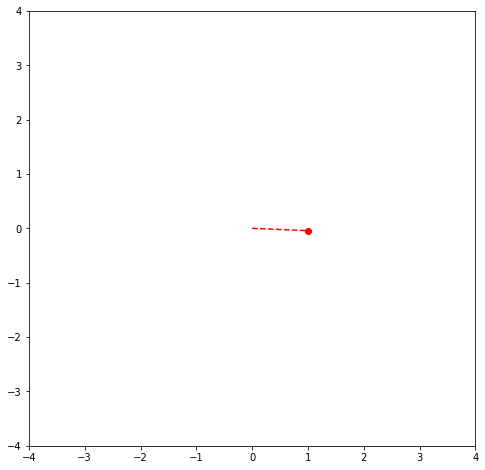

In [58]:
x, y = l*np.cos(ans[:,0]), -l*np.sin(ans[:,0])
fig, ax = plt.subplots(1,1,figsize=(8,8))
def update(i):
# clear the axis each frame
    ax.clear()
    # replot things
    ax.scatter(x[i],y[i],c='r',marker='o')
    ax.plot([0,x[i]],[0,y[i]],c= 'r',linestyle='--')
    lim = 4
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))

ani = animation.FuncAnimation(fig, update, frames=frms, interval=1)
ani.save('Rotary_spring_mass.gif',writer='pillow',fps=25)
